## Linear Factor Models

Linear Factor Models

Market_Portfolio.xlsx contains monthly nominal (net) returns for the market portfolio, expressed as a percentage. These returns cover the ten-year period from Jan 2004 through Dec 2013.

Assume that the risk-free rate is 0.13% per month. Regress the monthly excess returns for each of the ten industry portfolios on the monthly excess returns for the market portfolio, so as to estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolios. Create a table showing the intercept and slope coefficients for the ten industry portfolios. Briefly explain the economic significance of the intercept and slope coefficients.

Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio. Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding β (by construction, the market portfolio has β of one). This will give you the slope and intercept coefficients for the SML. (Warning: the results may be very different from what you would expect!)

Using the estimated slope and intercept coefficients, plot the SML in the range of β from zero to two on the horizontal axis. Also plot the positions of the ten industry portfolios and the market portfolio. (You are NOT required to label the individual portfolios.) Briefly explain the economic significance of the SML.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression

Market_Portfolio.xlsx contains monthly nominal (net) returns for the market portfolio, expressed as a percentage. These returns cover the ten-year period from Jan 2004 through Dec 2013.

Assume that the risk-free rate is 0.13% per month. 

In [3]:
data=pd.read_excel(r'Industry_Portfolios.xlsx',index_col=0, parse_dates=True)

In [4]:
data2=pd.read_excel(r'Market_Portfolio.xlsx',index_col=0,parse_dates=True)
data2['Rf']=0.13

Regress the monthly excess returns for each of the ten industry portfolios on the monthly excess returns for the market portfolio, so as to estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolios. 

E[Ri-Rf]=alpha +beta*[Rm-Rf]

alpha:Jenson Alpha

In [5]:
#regress monthly excess return of 10 industry on market return
alpha=[]  #intercept
beta=[]   #slope
for i in range(10):
    x=np.array(data2.iloc[:,0]-data2.iloc[:,1]).reshape((-1,1))  #x=rm-rf
    y=np.array(data.iloc[:,i]-data2.iloc[:,1])  #y=ri-rf
    model1=LinearRegression().fit(x,y)
    alpha.append(model1.intercept_)
    beta.append(model1.coef_[0]) 

coefficient_table=pd.DataFrame([alpha,beta],index=['intercept','slope'],columns=data.columns)
print(coefficient_table)

              NoDur     Durbl     Manuf     Enrgy     HiTec     Telcm  \
intercept  0.369443 -0.415599  0.159771  0.501719 -0.064020  0.194691   
slope      0.652647  1.648536  1.169846  0.969850  1.132969  0.900729   

              Shops      Hlth     Utils     Other  
intercept  0.275492  0.237841  0.444585 -0.387135  
slope      0.826492  0.673036  0.538086  1.207309  


Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio.

In [6]:
mmr = np.mean(data)
mmr

NoDur    0.902833
Durbl    0.733333
Manuf    1.012833
Enrgy    1.231167
HiTec    0.766250
Telcm    0.881417
Shops    0.916333
Hlth     0.783833
Utils    0.907167
Other    0.489083
dtype: float64

In [7]:
print("The mean monthly return:{}".format(mmr) )

The mean monthly return:NoDur    0.902833
Durbl    0.733333
Manuf    1.012833
Enrgy    1.231167
HiTec    0.766250
Telcm    0.881417
Shops    0.916333
Hlth     0.783833
Utils    0.907167
Other    0.489083
dtype: float64


In [8]:
mmp = np.mean(data2)

In [9]:
print("The mean monthly return for {}".format(mmp) )

The mean monthly return for Market    0.748083
Rf        0.130000
dtype: float64


Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding β (by construction, the market portfolio has β of one). This will give you the slope and intercept coefficients for the SML. (Warning: the results may be very different from what you would expect!)

In [10]:
# regress mean returns of 10 industries on betas of 10 industries
# to obtain intercept and coefficient of SML

beta.append(1)  
print("Beta for 10 industries and market: {}".format(beta))  # 11 beta

Beta for 10 industries and market: [0.6526473559635407, 1.6485356499666464, 1.1698462964148775, 0.9698499564640051, 1.1329694391423124, 0.9007292509476114, 0.8264924015201591, 0.6730356956329141, 0.5380861001316398, 1.2073094586151099, 1]


In [11]:
data.loc['mean']=np.mean(data)

In [12]:
data

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.060000,-1.070000,-0.620000,0.440000,4.53000,1.410000,0.450000,3.090000,1.920000,2.880000
200402,4.250000,-0.070000,1.950000,4.690000,-2.92000,-0.520000,6.090000,0.890000,2.070000,2.160000
200403,-0.090000,-1.150000,-0.270000,-0.130000,-2.55000,-2.070000,0.290000,-3.960000,1.130000,-0.630000
200404,1.420000,2.300000,-0.170000,2.520000,-4.91000,-0.480000,-2.700000,3.540000,-3.550000,-3.760000
200405,-1.890000,-1.640000,1.610000,0.390000,4.85000,-2.950000,0.300000,-0.420000,1.280000,1.860000
...,...,...,...,...,...,...,...,...,...,...
201309,1.940000,6.460000,5.200000,2.030000,3.77000,4.330000,4.460000,4.190000,1.050000,3.830000
201310,4.750000,0.720000,4.560000,4.860000,3.80000,5.520000,5.080000,3.470000,3.350000,3.870000
201311,1.290000,1.810000,2.950000,0.850000,3.65000,0.270000,3.670000,4.540000,-1.810000,4.740000


In [13]:
data2.loc['mktmean']=np.mean(data2)

In [14]:
data2

,Market,Rf
Date,,
200401,2.220000,0.13
200402,1.460000,0.13
200403,-1.230000,0.13
200404,-1.750000,0.13
200405,1.230000,0.13
...,...,...
201309,3.760000,0.13
201310,4.170000,0.13
201311,3.120000,0.13


In [15]:
return_SML=data.loc['mean']
return_SML['mktmean']=data2.iloc[-1,0]
print('The mean monthly return:{}'.format(return_SML))  # 11 return

The mean monthly return:NoDur      0.902833
Durbl      0.733333
Manuf      1.012833
Enrgy      1.231167
HiTec      0.766250
Telcm      0.881417
Shops      0.916333
Hlth       0.783833
Utils      0.907167
Other      0.489083
mktmean    0.748083
Name: mean, dtype: float64


In [16]:
for j in range(11):
    x2=np.array(beta).reshape((-1,1))  #beta
    y2=np.array(return_SML)  # mean of 10 industries respectively
    model2=LinearRegression().fit(x2,y2)
print(model2.intercept_, model2.coef_[0])

1.032768368265706 -0.18546745836573286


In [17]:
model2.intercept_

1.032768368265706

In [18]:
model2.coef_[0]

-0.18546745836573286

Using the estimated slope and intercept coefficients, plot the SML in the range of β from zero to two on the horizontal axis. Also plot the positions of the ten industry portfolios and the market portfolio.

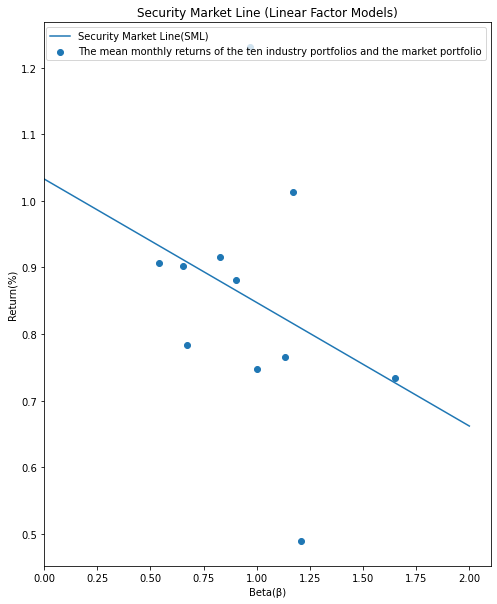

In [19]:
#plot SML & mean returns of 10 industries
fig,ax=plt.subplots(figsize=(8,10))
x_axis=np.linspace(0,2,100)
y_axis=model2.intercept_+model2.coef_[0]*x_axis # y = c+ ax
plt.plot(x_axis,y_axis,label = 'Security Market Line(SML)')
plt.scatter(beta,return_SML,label='The mean monthly returns of the ten industry portfolios and the market portfolio')
plt.title('Security Market Line (Linear Factor Models)')
plt.xlabel('Beta(β)')
plt.ylabel('Return(%)')
plt.xlim((0, 2.1))
plt.legend()
plt.show()

Economic significance:

Intercept coefficient from market model regression represents CAPM pricing error.

Slope coefficient from market model regression represents amount of exposure to market risk.

According to CAPM, all appropriately-priced assets should lie on SML. Assets that lie above SML are underpriced, while assets that lie below SML are overpriced.